In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables-2.csv")
#print(df.head(), "\n")
df

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage,Wetterklasse,Niederschlag,year,month,weekday,season,warmer_than_week_before,colder_than_week_before
0,2013-07-01,6.0,17.8375,15.0,0.0,1.0,148.828353,0.0,1.0,6,0.3,2013,7,0,2,0.0000,0.925000
1,2013-07-01,6.0,17.8375,15.0,0.0,2.0,535.856285,0.0,1.0,6,0.3,2013,7,0,2,0.0000,0.925000
2,2013-07-01,6.0,17.8375,15.0,0.0,3.0,201.198426,0.0,1.0,6,0.3,2013,7,0,2,0.0000,0.925000
3,2013-07-01,6.0,17.8375,15.0,0.0,4.0,65.890169,0.0,1.0,6,0.3,2013,7,0,2,0.0000,0.925000
4,2013-07-01,6.0,17.8375,15.0,0.0,5.0,317.475875,0.0,1.0,6,0.3,2013,7,0,2,2.3125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,2018-07-30,6.0,27.7875,10.0,0.0,1.0,148.541340,0.0,1.0,6,0.0,2018,7,0,2,0.0000,0.658929
6995,2018-07-30,6.0,27.7875,10.0,0.0,2.0,616.358562,0.0,1.0,6,0.0,2018,7,0,2,0.0000,0.687500
6996,2018-07-30,6.0,27.7875,10.0,0.0,3.0,348.770346,0.0,1.0,6,0.0,2018,7,0,2,0.0000,0.550000
6997,2018-07-30,6.0,27.7875,10.0,0.0,4.0,71.822977,0.0,1.0,6,0.0,2018,7,0,2,0.0000,0.412500


In [2]:
#print(df.describe())
df.describe()

,Bewoelkung,Temperatur,Windgeschwindigkeit,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage,Wetterklasse,Niederschlag,year,month,weekday,season,warmer_than_week_before,colder_than_week_before
count,6999.000000,6999.00000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.00000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,5.308473,10.72907,11.175025,0.023575,3.100157,200.378479,0.019431,0.152450,4.579797,2.534105,2015.68767,6.581226,3.017574,2.608230,0.694784,0.689766
std,2.392562,6.84571,4.334977,0.151731,1.497201,140.549060,0.138045,0.359483,2.444561,4.352558,1.52465,3.670393,1.993661,1.139948,1.172045,1.148175
min,0.000000,-8.47500,3.000000,0.000000,1.000000,7.051201,0.000000,0.000000,0.000000,0.000000,2013.00000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,4.000000,5.50000,8.000000,0.000000,2.000000,94.626822,0.000000,0.000000,2.000000,0.000000,2014.00000,3.000000,1.000000,2.000000,0.000000,0.000000
50%,6.000000,10.00000,10.000000,0.000000,3.000000,155.268163,0.000000,0.000000,6.000000,0.400000,2016.00000,7.000000,3.000000,3.000000,0.000000,0.042857
75%,7.000000,16.38750,14.000000,0.000000,4.000000,271.448535,0.000000,0.000000,6.000000,3.100000,2017.00000,10.000000,5.000000,4.000000,1.000000,0.982143
max,8.000000,28.87500,35.000000,1.000000,6.000000,1879.461831,1.000000,1.000000,8.000000,37.700000,2018.00000,12.000000,6.000000,4.000000,12.250000,11.632143


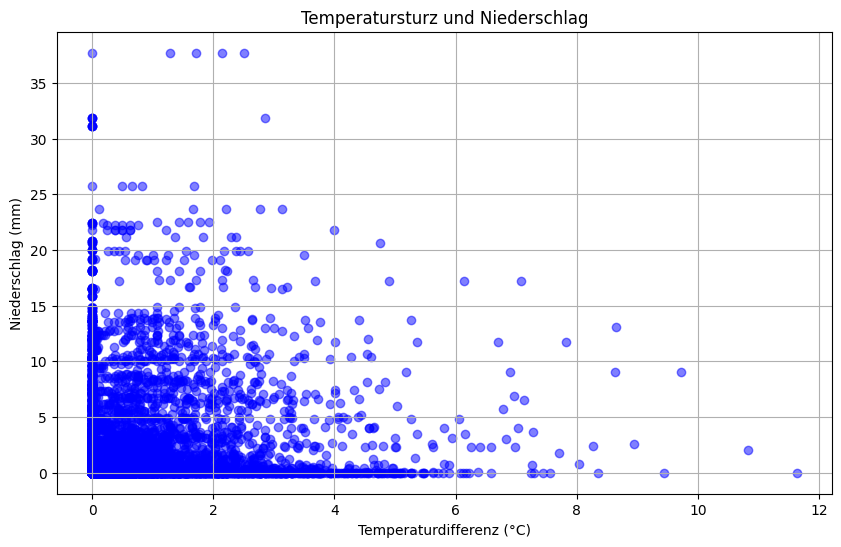

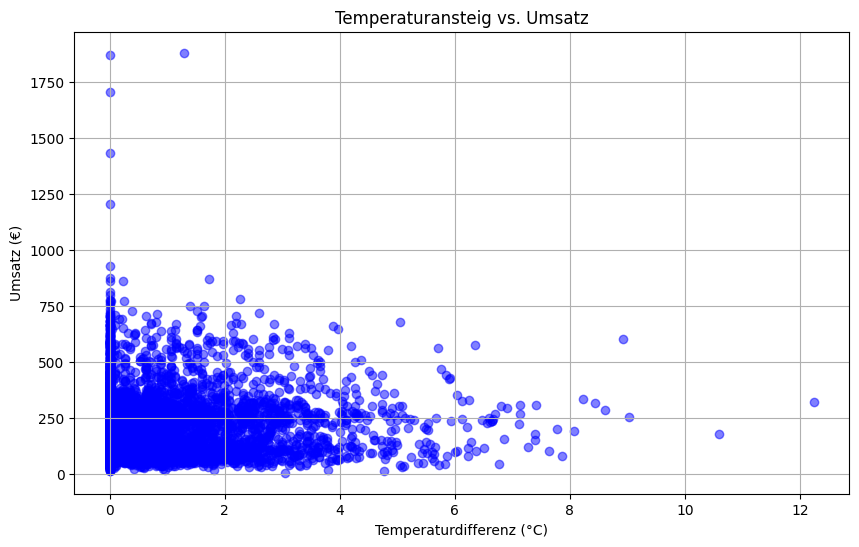

In [6]:
# hier vielleicht etwas wählen, was besser korreliert... 
# (evtl. sollten wir die Tmeperaturdifferenz doch nicht teilen? 
# Oder noch so etwas wie die gefühlte Temperatur einbringen)

# Create Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['colder_than_week_before'], df['Niederschlag'], color='blue', alpha=0.5)
plt.title('Temperatursturz und Niederschlag')
plt.xlabel('Temperaturdifferenz (°C)')
plt.ylabel('Niederschlag (mm)')
plt.grid(True)
plt.show()

# Create Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['warmer_than_week_before'], df['Umsatz'], color='blue', alpha=0.5)
plt.title('Temperaturansteig vs. Umsatz')
plt.xlabel('Temperaturdifferenz (°C)')
plt.ylabel('Umsatz (€)')
plt.grid(True)
plt.show()

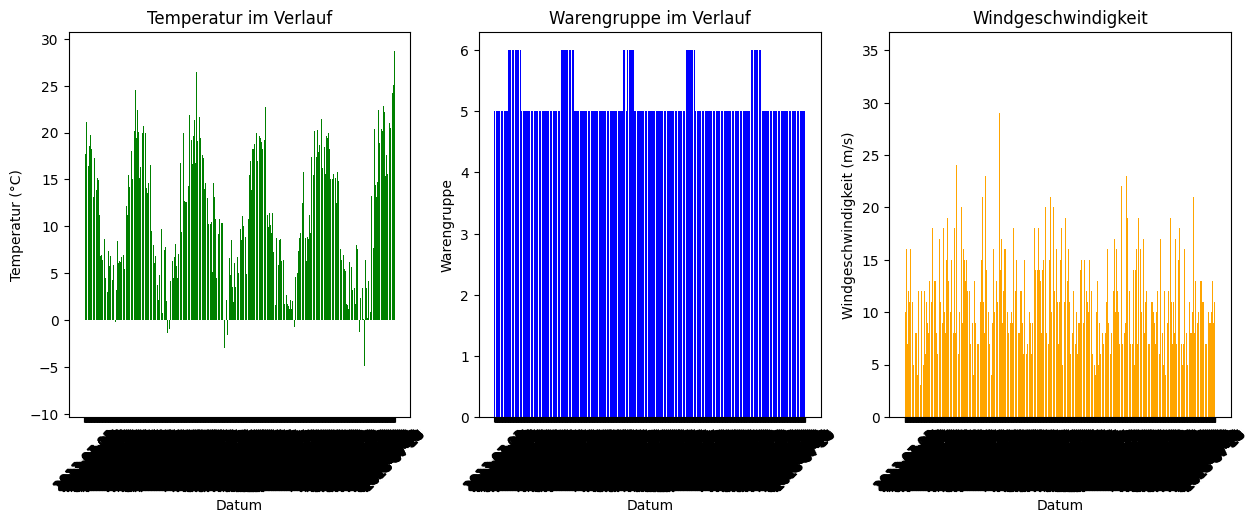

In [8]:
# hier auch Inhalt anpassen. Evtl macht es gar nicht so viel Sinn mit dem barplot für unsere selbst hinzugefügten Variablen?
# die Warengruppen müsste man wenn dann einzeln plotten. 

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the first bar chart
axes[0].bar(df['Datum'], df['Temperatur'], color='green')
axes[0].set_title('Temperatur im Verlauf')
axes[0].set_xlabel('Datum')
axes[0].set_ylabel('Temperatur (°C)')
axes[0].tick_params(axis='x', rotation=45)

# Plotting the second bar chart
axes[1].bar(df['Datum'], df['Warengruppe'], color='blue')
axes[1].set_title('Warengruppe im Verlauf')
axes[1].set_xlabel('Datum')
axes[1].set_ylabel('Warengruppe')
axes[1].tick_params(axis='x', rotation=45)

# Plotting the third bar chart
axes[2].bar(df['Datum'], df['Windgeschwindigkeit'], color='orange')
axes[2].set_title('Windgeschwindigkeit')
axes[2].set_xlabel('Datum')
axes[2].set_ylabel('Windgeschwindigkeit (m/s)')
axes[2].tick_params(axis='x', rotation=45)


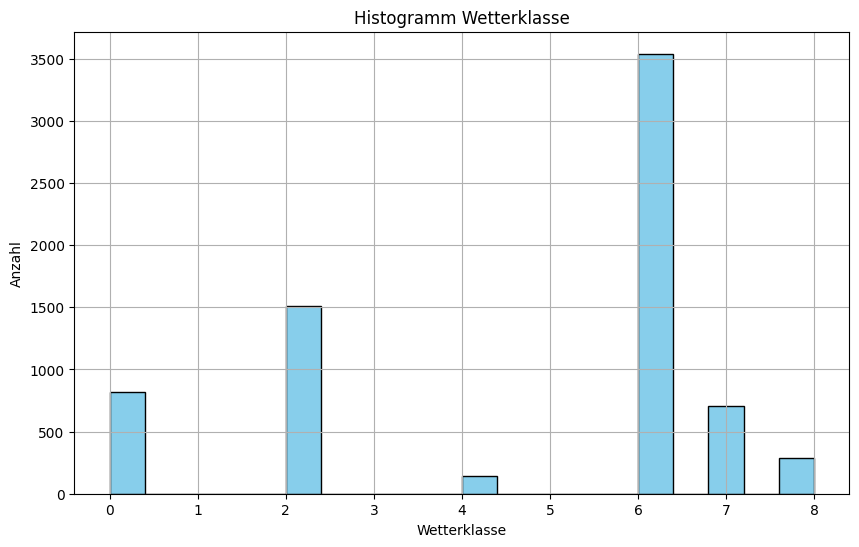

In [9]:
# Create Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Wetterklasse'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramm Wetterklasse')
plt.xlabel('Wetterklasse')
plt.ylabel('Anzahl')
plt.grid(True)
plt.show()

In [ ]:
# 